<a href="https://colab.research.google.com/github/Camilopc-coder/CODERHOUSE/blob/main/ENTREGAS/ProyectoDS_Parte2_Pavas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCION


Para desarrollar este primer entregable, escogi un dataset enfocado en la venta de videojuegos y su popularidad a nivel mundial. Escogi este dataset porque soy fanatico de los videojuegos y las consolas, siempre me ha gustado comparar los mejores.



El dataset fue sacado de la siguiente fuente:
https://www.kaggle.com/datasets/ibriiee/video-games-sales-dataset-2022-updated-extra-feat



Este dataset cuenta entrega datos de el nombre del videojuego, la plataforma, el año de lanzamiento, el género, el editor y las ventas en Norteamérica, Europa, Japón y otras regiones. También presenta las puntuaciones y clasificaciones tanto de críticos como de usuarios, incluyendo la puntuación media de los críticos, el número de críticos que realizaron reseñas, la puntuación media de los usuarios, el número de usuarios que realizaron reseñas, el desarrollador y la clasificación


Importacion de librerias y la carga de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_style("whitegrid")

matplotlib.rcParams['figure.figsize']=(36,20)
from google.colab import files
import io

In [2]:
dataset = files.upload()

Saving Video_Games.csv to Video_Games.csv


In [3]:
df = pd.read_csv("Video_Games.csv")
df.head(500)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Super Mario World 2: Yoshi's Island,GBA,2002.0,Platform,Nintendo,1.75,0.45,0.62,0.09,2.91,NaN,NaN,NaN,NaN,NaN,NaN
496,Mass Effect,X360,2007.0,Role-Playing,Microsoft Game Studios,1.83,0.79,0.03,0.27,2.91,91.0,74.0,8.7,1692.0,BioWare,M
497,Sonic Mega Collection Plus,PS2,2004.0,Misc,Sega,1.54,1.14,0.00,0.22,2.90,73.0,21.0,8.6,30.0,Sonic Team,E
498,World Soccer Winning Eleven 7 International,PS2,2003.0,Sports,Konami Digital Entertainment,0.08,1.24,1.13,0.45,2.90,93.0,28.0,9,45.0,KCET,E


In [4]:
df.shape

(16719, 16)

In [5]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


Visualizando el dataset veo que tiene 16719 filas y 16 columnas pero veo que estan en ingles. Como quiero traducir todas las columnas del ingles al español, entonces primero quiero saber cuales son todas y luego hago el renombrado de estas

In [6]:
traduccion_de_columnas = {
    'Name': 'Nombre',
    'Platform': 'Plataforma',
    'Year_of_Release': 'Año_de_Lanzamiento',
    'Genre': 'Genero',
    'Publisher': 'Editor',
    'NA_Sales': 'Ventas_NA',
    'EU_Sales': 'Ventas_EU',
    'JP_Sales': 'Ventas_JP',
    'Other_Sales': 'Otras_Ventas',
    'Global_Sales': 'Ventas_Globales',
    'Critic_Score': 'Puntuacion_Criticos',
    'Critic_Count': 'Conteo_Criticos',
    'User_Score': 'Puntuacion_Usuarios',
    'User_Count': 'Conteo_Usuarios',
    'Developer': 'Desarrollador',
    'Rating': 'Clasificacion'
}

df = df.rename(columns=traduccion_de_columnas)

print("Nuevos nombres de las columnas:")
print(df.columns)


Nuevos nombres de las columnas:
Index(['Nombre', 'Plataforma', 'Año_de_Lanzamiento', 'Genero', 'Editor',
       'Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas',
       'Ventas_Globales', 'Puntuacion_Criticos', 'Conteo_Criticos',
       'Puntuacion_Usuarios', 'Conteo_Usuarios', 'Desarrollador',
       'Clasificacion'],
      dtype='object')


Ahora quiero ver como quedo mi dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               16717 non-null  object 
 1   Plataforma           16719 non-null  object 
 2   Año_de_Lanzamiento   16450 non-null  float64
 3   Genero               16717 non-null  object 
 4   Editor               16665 non-null  object 
 5   Ventas_NA            16719 non-null  float64
 6   Ventas_EU            16719 non-null  float64
 7   Ventas_JP            16719 non-null  float64
 8   Otras_Ventas         16719 non-null  float64
 9   Ventas_Globales      16719 non-null  float64
 10  Puntuacion_Criticos  8137 non-null   float64
 11  Conteo_Criticos      8137 non-null   float64
 12  Puntuacion_Usuarios  10015 non-null  object 
 13  Conteo_Usuarios      7590 non-null   float64
 14  Desarrollador        10096 non-null  object 
 15  Clasificacion        9950 non-null  

Teniendo en cuenta el resultado de arriba, puedo entender que:

* no todos los juegos fueron puntuados o tienen una clasificacion

* el año de lanzamiento y el nombre coinciden con el indice

Entonces el siguiente paso será limpiar mi dataset  

In [8]:
#remuevo los valores NULL en la columna de año de lanzamiento
df.drop(df[df.Año_de_Lanzamiento.isnull()].index, inplace=True)

#remuevo los valores NULL en la columna del Nombre
df.drop(df[df.Nombre.isnull()].index, inplace=True)

#remuevo los valores NULL en la columna del Editor
df.drop(df[df.Editor.isnull()].index, inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre               16416 non-null  object 
 1   Plataforma           16416 non-null  object 
 2   Año_de_Lanzamiento   16416 non-null  float64
 3   Genero               16416 non-null  object 
 4   Editor               16416 non-null  object 
 5   Ventas_NA            16416 non-null  float64
 6   Ventas_EU            16416 non-null  float64
 7   Ventas_JP            16416 non-null  float64
 8   Otras_Ventas         16416 non-null  float64
 9   Ventas_Globales      16416 non-null  float64
 10  Puntuacion_Criticos  7982 non-null   float64
 11  Conteo_Criticos      7982 non-null   float64
 12  Puntuacion_Usuarios  9837 non-null   object 
 13  Conteo_Usuarios      7461 non-null   float64
 14  Desarrollador        9904 non-null   object 
 15  Clasificacion        9767 non-null   obje

Una vez tengo mi data set limpio, me gustaria tener una descripcion del mismo mas minuciosa

In [9]:
df.describe()

,Año_de_Lanzamiento,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Ventas_Globales,Puntuacion_Criticos,Conteo_Criticos,Conteo_Usuarios
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


DESCRIPCION DEL DATASET

---
Ahora haré una descripcion de las columnas del dataset y de los datos arrojados

COLUMNAS

* Nombre: Es el nombre del videojuego             
* Plataforma: Es la consola donde se puede jugar
* Año_de_Lanzamiento: El año cuando fue lanzado  
* Genero: El genero puede ir desde accion, deportes, musica, carreras y otros.               
* Editor: Es basicamente el encargado de haber lanzado el juego             
* Ventas_NA: En esta columna irá el numero de ventas de norteameria             
* Ventas_EU: En esta columna irá el numero de ventas de europa en general            
* Ventas_JP: En esta columna irá el número de ventas de Japón           
* Otras_Ventas: Esta columna contrendá el número de ventas que no están incluidas en las demas columnas, tendrá paises de latinoameria y asiaticos            
* Ventas_Globales: Esta columna contiene el total de ventas sumadas por cada juego       
* Puntuacion_Criticos: Contiene el puntaje criticos del juego   
* Conteo_Criticos: Aqui va el número de criticos que puntuaron el juego      
* Puntuacion_Usuarios: Este contiene el puntaje de los usuarios en general de cada uno de los juegos
* Conteo_Usuarios: El número de usuarios que dieron puntuación       
* Desarrollador: Contiene la informacion del diseñador y desarrollador del juego          
* Clasificacion: Es la etiqueta del juego según su contenido y hacia qué publico especifico va dirigido, puede ser una letra o varias con un número

---

ANALISIS

* Al hacer el uso de la funcion 'describe' puedo entender que en mi dataset hay informacion de ventas desde 1980 hasta el 2020.

* Norteameria parecer ser el mercado que más movimiento tiene en cuanto a ventas

* Los valores de ventas estan dados en MILLÓNES

---

Ahora me gustaria visualizar el total de ventas a lo largo del tiempo para mejorar la comprensión de mi dataset

/tmp/ipython-input-2959067645.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Año_de_Lanzamiento'], palette="Spectral_r")


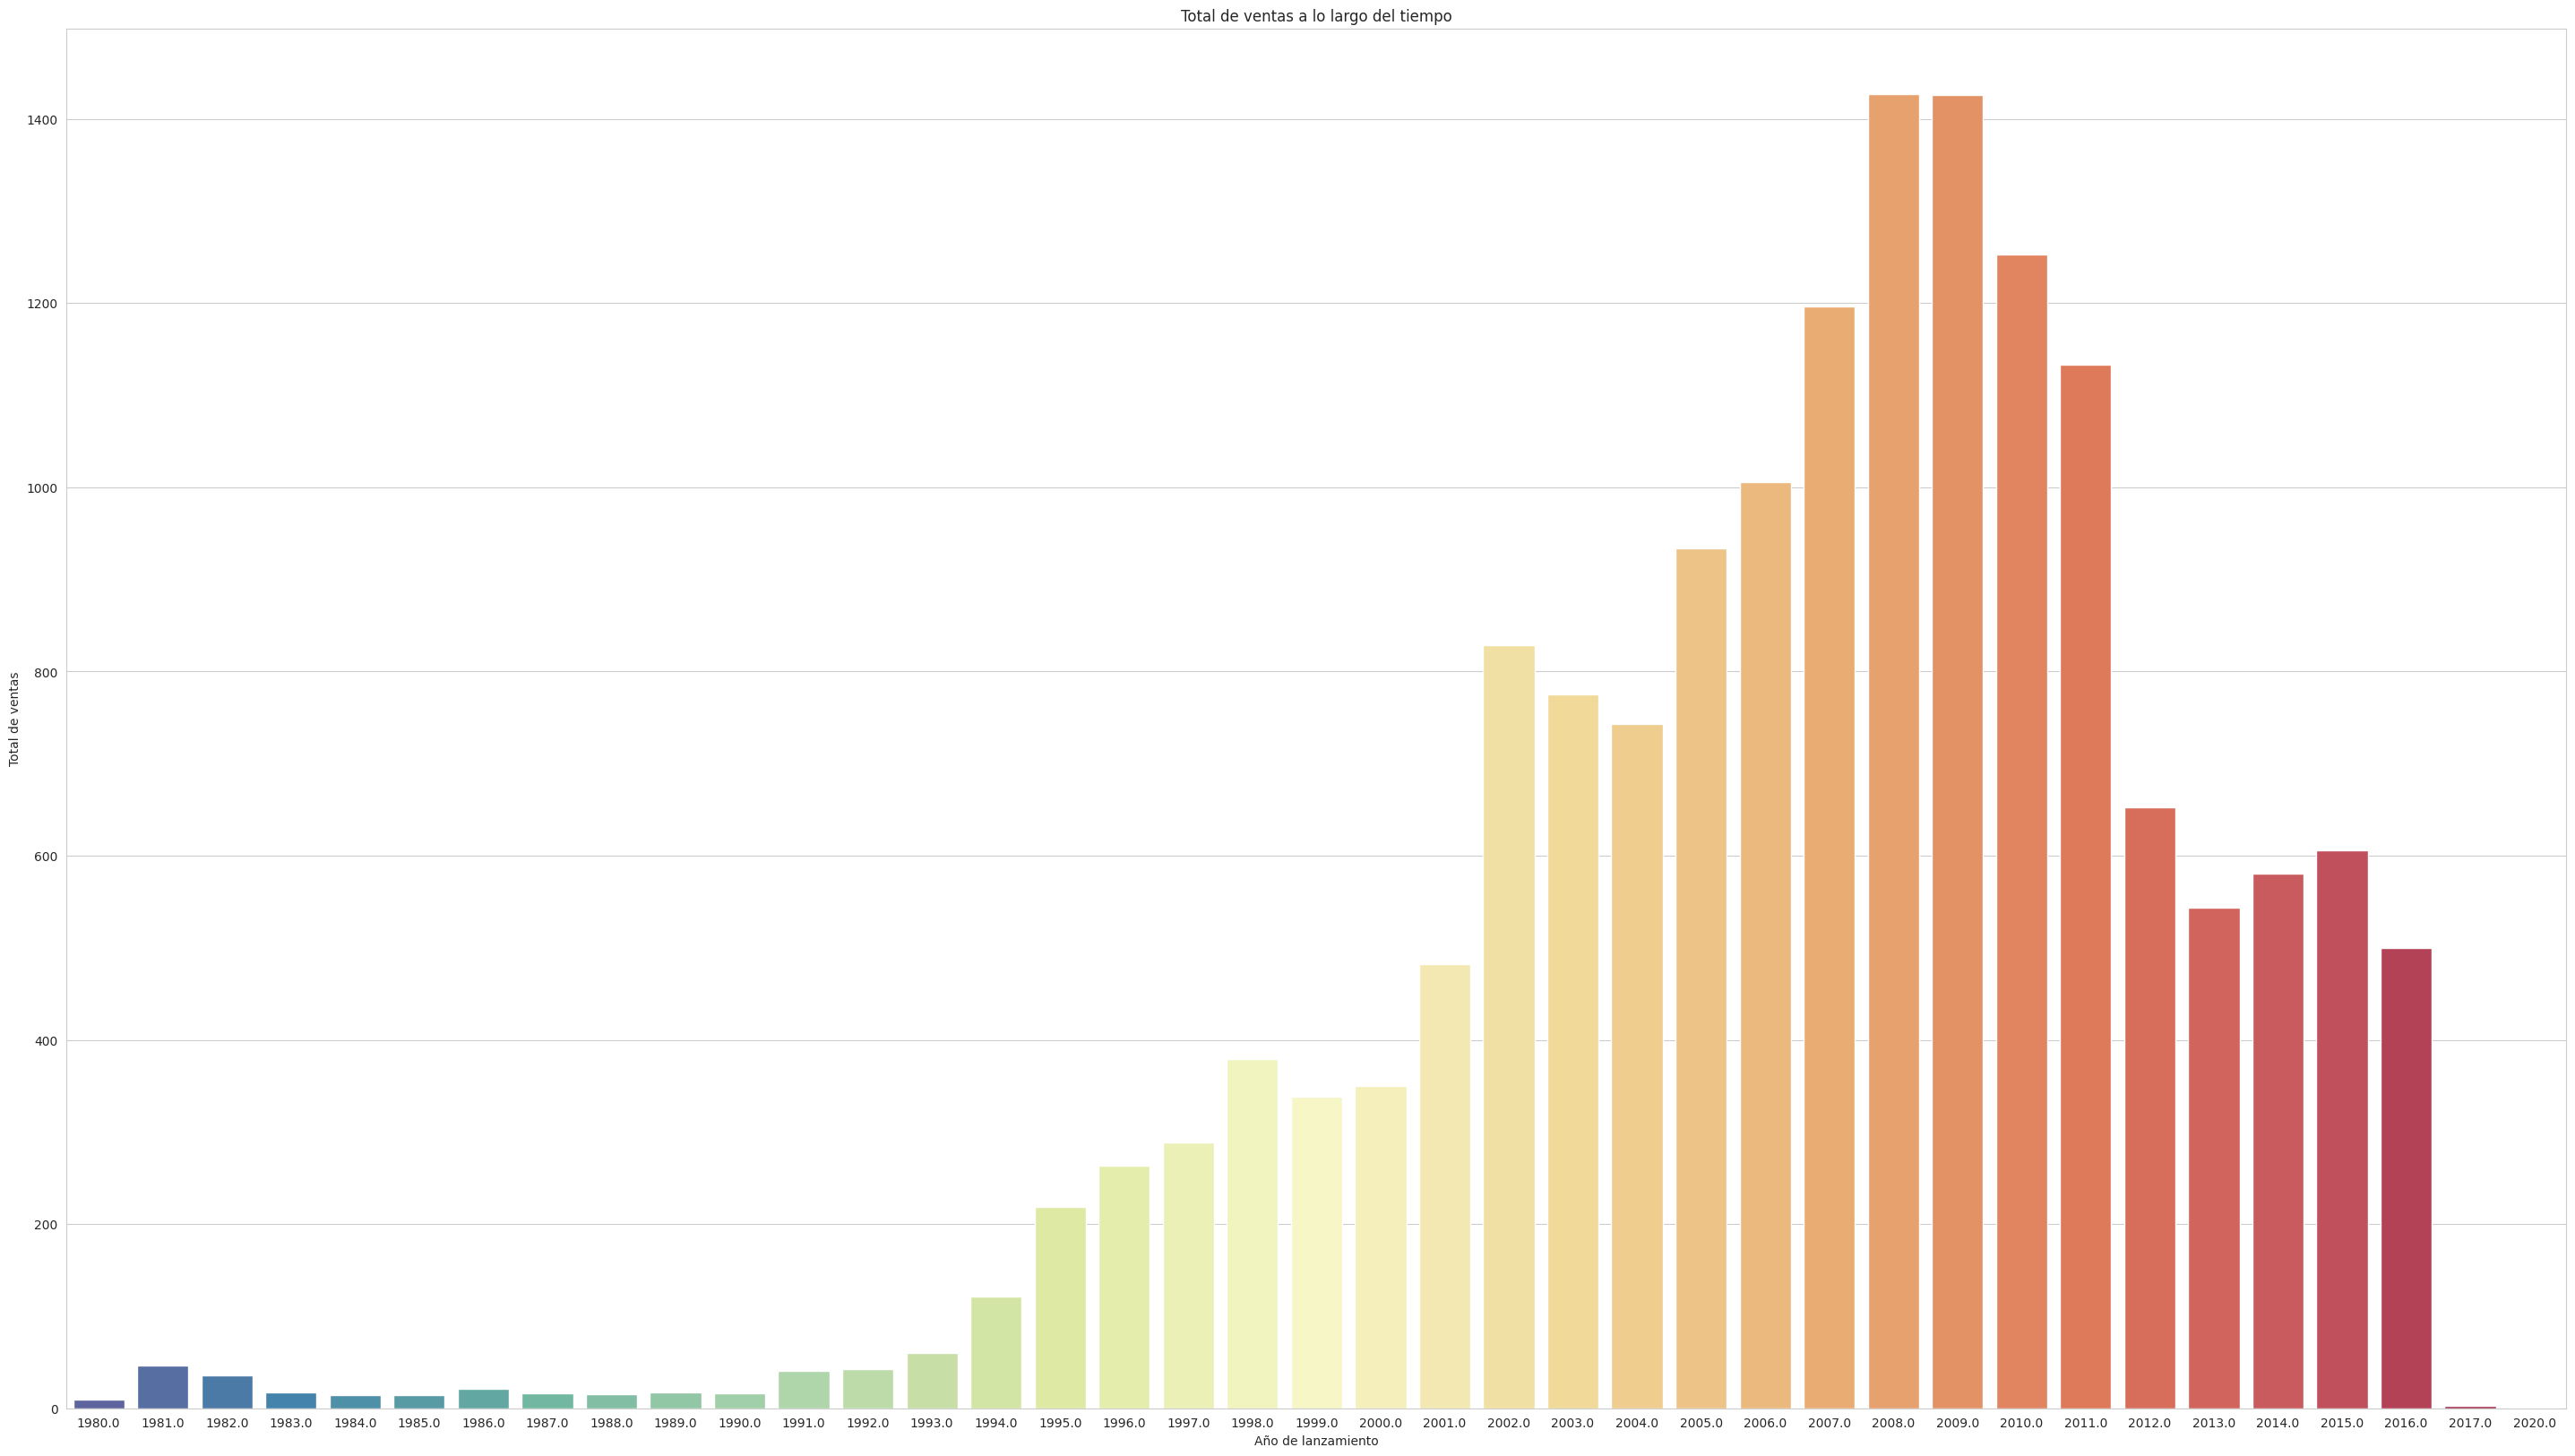

In [10]:
sns.countplot(x=df['Año_de_Lanzamiento'], palette="Spectral_r")
plt.title('Total de ventas a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Total de ventas')
plt.show()

Ahora teniendo en cuenta la grafica de ventas, veo que en el año 2016 en adelante no hay muchos datos, entonces optaré por quitar esos años de mi dataset

In [11]:
df.drop(df[df['Año_de_Lanzamiento']>2016].index, inplace=True)

/tmp/ipython-input-3504280143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Año_de_Lanzamiento'], palette="Spectral_r")


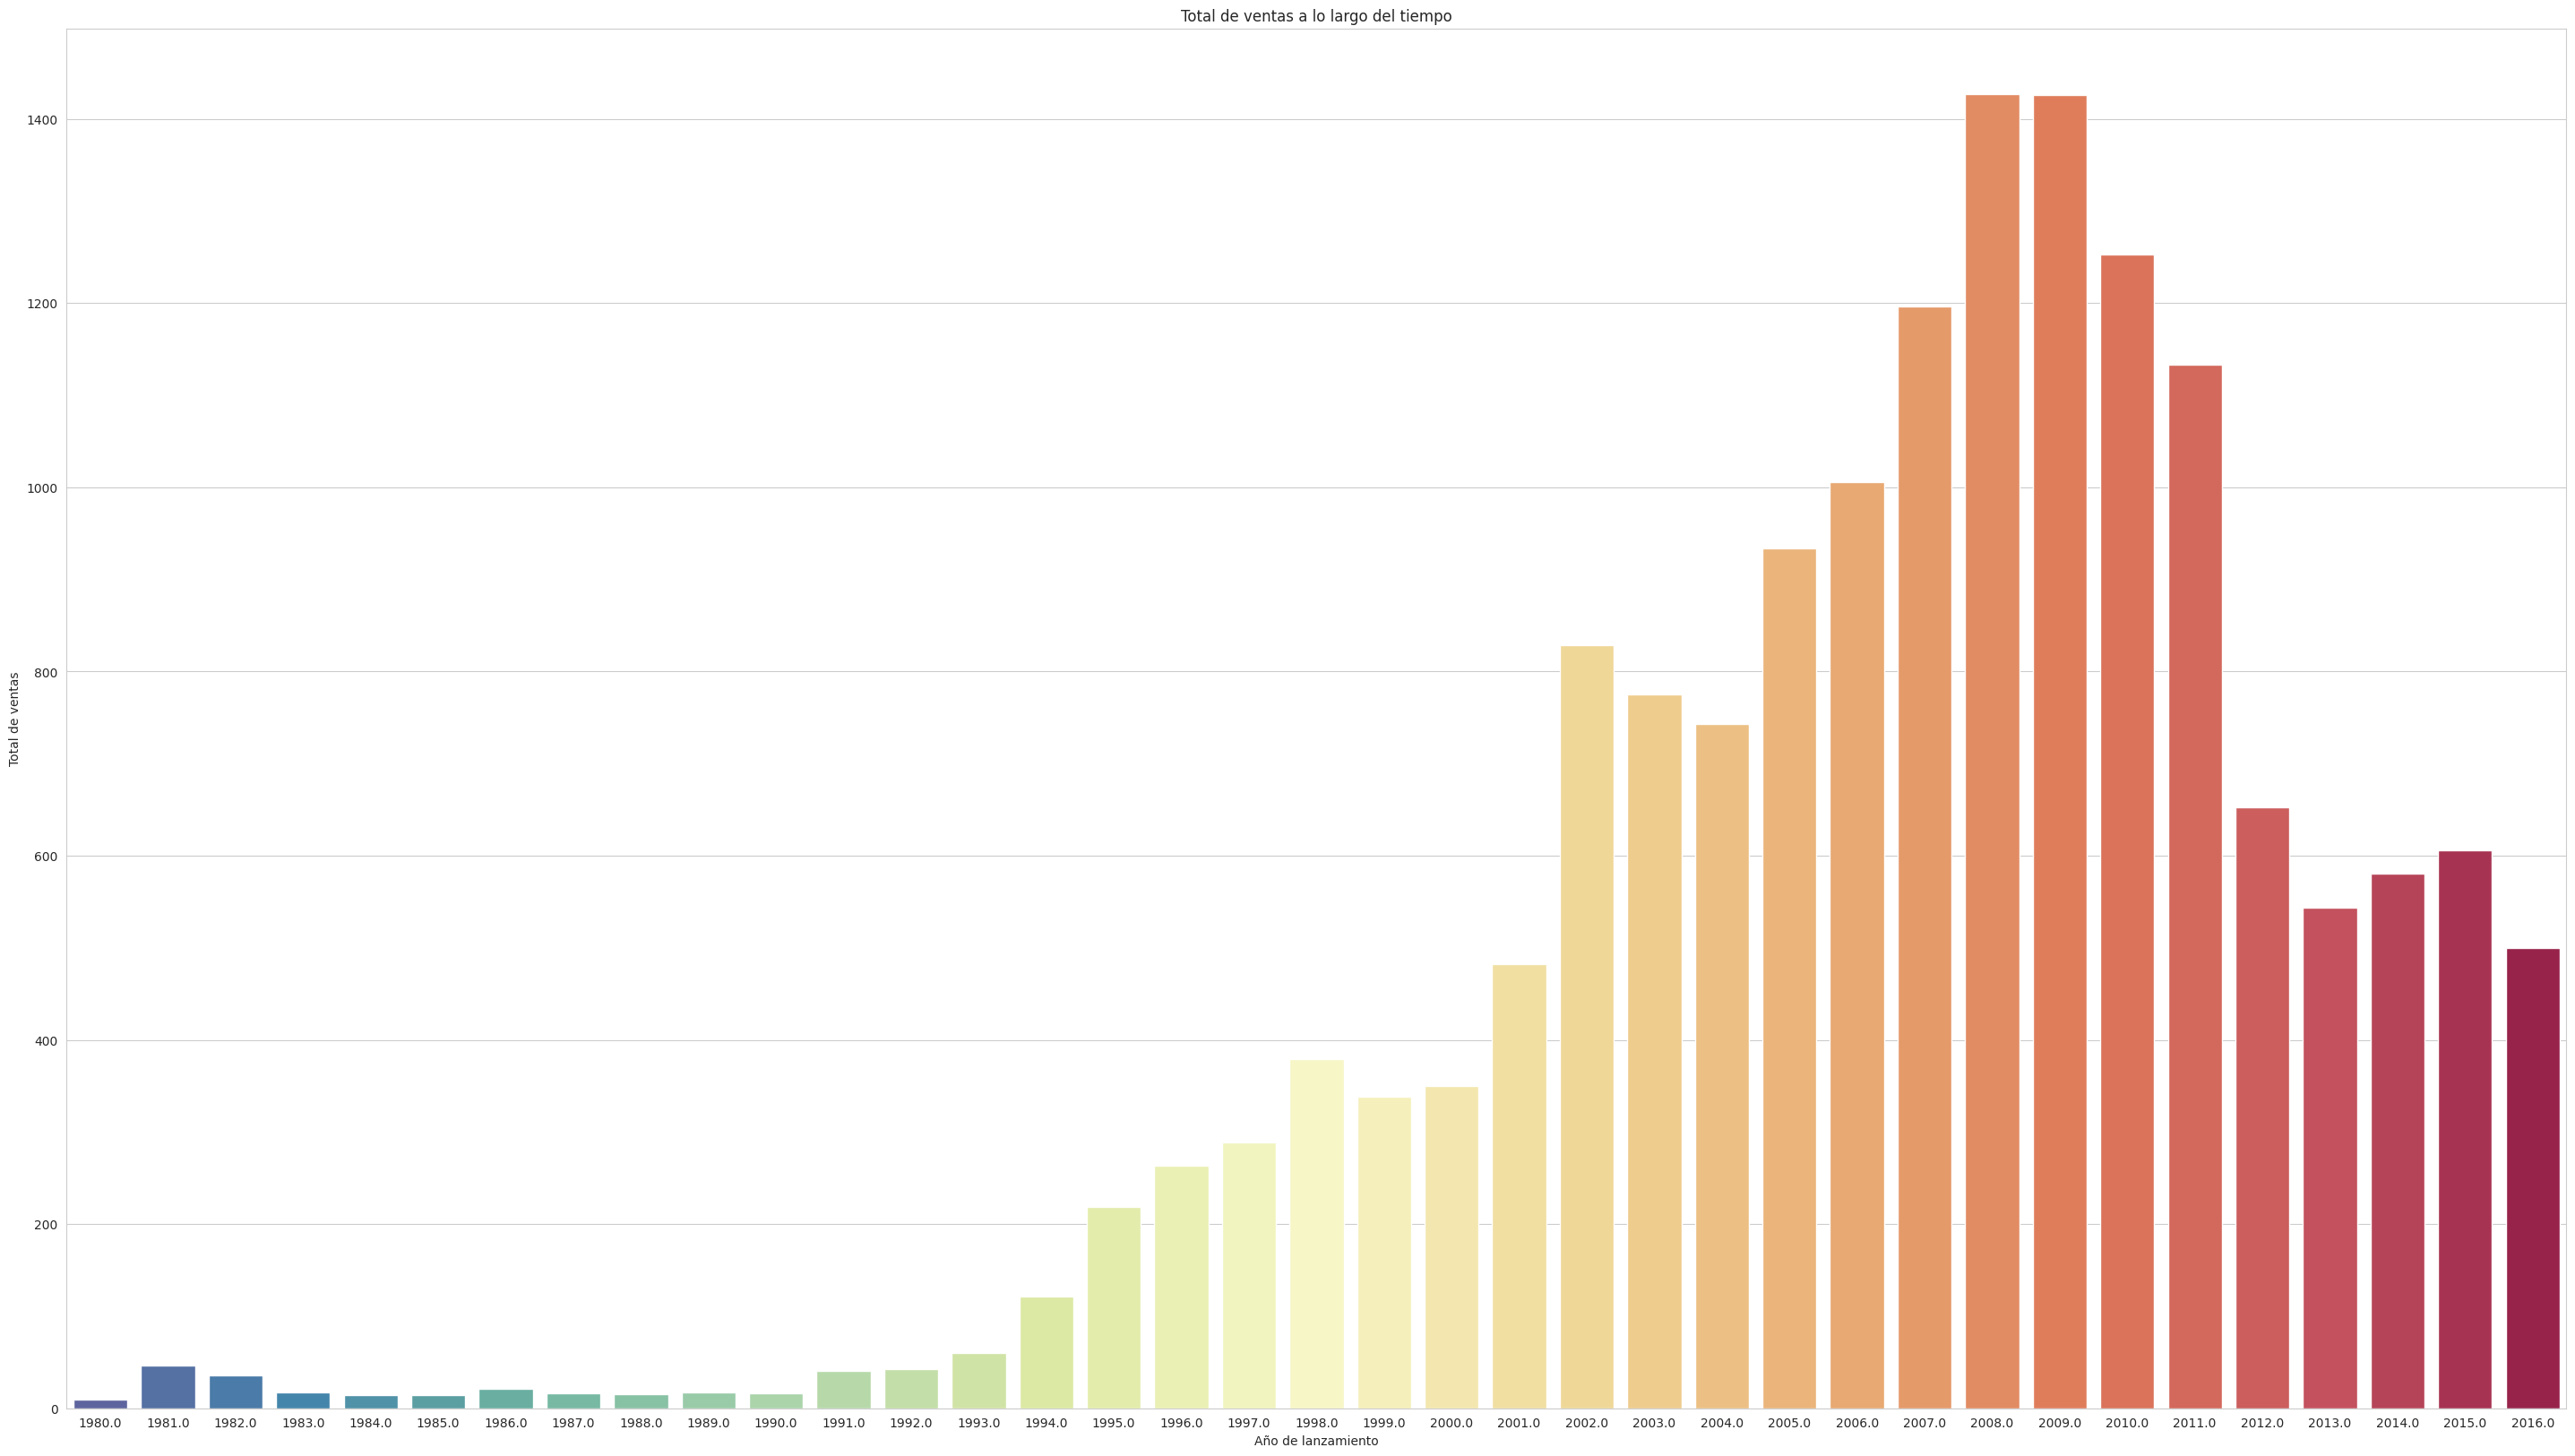

In [12]:
sns.countplot(x=df['Año_de_Lanzamiento'], palette="Spectral_r")
plt.title('Total de ventas a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Total de ventas')
plt.show()



HIPOTESIS

---

Ahora que tengo un dataset mas limpio, y tengo claro varios aspectos hare mis hipotesis

1. Cual es el genero que mas ventas ha generado a nivel global? y cual es el genero que mas ventas ha generado en Japon?

2. Cual es el editor que más ventas tiene en Norteamerica? y cual es el juego más jugado de esta plataforma?

3. Cual es la plataforma que más ventas ha tenido en toda la historia globalmente? y cual es la plataforma más vendida en cada una de las regiones distintivas

---

1. El genero de acción (Action) es el genero que más ventas tendrá a nivel global, seguido del genero de disparos (Shooter) y en tercera pocisión el genero de aventura (Adventure). Pero en Japon el genero sera el de miscelaneas (Misk), dado que en esa zona del mundo suelen jugar más juego alternativos

2. El editor que más ventas tendrá en Norteamerica, será Activision y su juego más jugado será un CALL OF DUTY

3. La plataforma que más ha vendido en toda la historia será la Nintendo Wii seguido de la PS2 y luego la PS3
En cambio, en estados unidos la XBOX360 será la primera, seguido de PS3 y en tercera posicion PC
En Japon, será la NintendoDS será la principal plataforma, ya que nació allá, seguido de la Wii y en tercera posicion la PS2
En Europa la cosa cambiará rotundamente, siendo el PC la principal plataforma de juegos, seguido del XBOX360 y en tercera posición la PS2

---


# 1. Cual es el genero que mas ventas ha generado a nivel global? y cual es el genero que más ventas ha generado en japon?



In [13]:
# Genero mi df agrupados por genero y ordenado por las ventas globales
df_top_genero = df.groupby('Genero')['Ventas_Globales'].sum().reset_index()

df_top_genero = df_top_genero.sort_values(by='Ventas_Globales', ascending=False)

print("Géneros con las mayores ventas globales:")
print(df_top_genero.head())

Géneros con las mayores ventas globales:
          Genero  Ventas_Globales
0         Action          1717.61
10        Sports          1310.39
8        Shooter          1041.83
7   Role-Playing           930.85
4       Platform           825.86


In [14]:
# Agrupo el df por genero y luego hago una suma de las ventas
df_genero_ventas = df.groupby('Genero')[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas']].sum().reset_index()

print(df_genero_ventas)

          Genero  Ventas_NA  Ventas_EU  Ventas_JP  Otras_Ventas
0         Action     863.17     510.99     160.13        182.22
1      Adventure     101.39      63.15      52.22         16.37
2       Fighting     220.51      99.00      87.28         35.87
3           Misc     394.01     208.55     107.02         73.00
4       Platform     444.44     199.39     130.71         51.01
5         Puzzle     121.13      49.78      56.68         12.30
6         Racing     356.86     234.48      56.63         75.51
7   Role-Playing     330.04     188.24     353.39         59.41
8        Shooter     584.83     314.52      38.68        103.33
9     Simulation     180.40     113.17      63.64         30.57
10        Sports     671.20     371.33     134.93        132.21
11      Strategy      67.69      44.69      49.30         10.73


In [15]:
# Calculo las ventas globales para mi df y lo organizo
df_genero_ventas['Ventas_Globales'] = df_genero_ventas[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas']].sum(axis=1)

print (df_genero_ventas)

          Genero  Ventas_NA  Ventas_EU  Ventas_JP  Otras_Ventas  \
0         Action     863.17     510.99     160.13        182.22   
1      Adventure     101.39      63.15      52.22         16.37   
2       Fighting     220.51      99.00      87.28         35.87   
3           Misc     394.01     208.55     107.02         73.00   
4       Platform     444.44     199.39     130.71         51.01   
5         Puzzle     121.13      49.78      56.68         12.30   
6         Racing     356.86     234.48      56.63         75.51   
7   Role-Playing     330.04     188.24     353.39         59.41   
8        Shooter     584.83     314.52      38.68        103.33   
9     Simulation     180.40     113.17      63.64         30.57   
10        Sports     671.20     371.33     134.93        132.21   
11      Strategy      67.69      44.69      49.30         10.73   

    Ventas_Globales  
0           1716.51  
1            233.13  
2            442.66  
3            782.58  
4            825.5

In [16]:
df_top3_genero_jp = df_genero_ventas.nlargest(3, 'Ventas_JP')

print(df_top3_genero_jp)


          Genero  Ventas_NA  Ventas_EU  Ventas_JP  Otras_Ventas  \
7   Role-Playing     330.04     188.24     353.39         59.41   
0         Action     863.17     510.99     160.13        182.22   
10        Sports     671.20     371.33     134.93        132.21   

    Ventas_Globales  
7            931.08  
0           1716.51  
10          1309.67  


In [17]:
# Saco el top 10 generos
top_10_generos = df_genero_ventas.nlargest(10, 'Ventas_Globales')

# Creo el df para graficar
df_grafico_top_genero = top_10_generos.melt(
    id_vars=['Genero'],
    value_vars=['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas'],
    var_name='Region',
    value_name='Ventas (En millones)')

# Renombro las etiquetas
df_grafico_top_genero['Region'] = df_grafico_top_genero['Region'].replace({
    'Ventas_NA': 'VENTAS DE NORTEAMERICA',
    'Ventas_EU': 'VENTAS DE EUROPA',
    'Ventas_JP': 'VENTAS DE JAPON',
    'Otras_Ventas': 'VENTAS DE OTROS PAISES'})

print (df_grafico_top_genero)

          Genero                  Region  Ventas (En millones)
0         Action  VENTAS DE NORTEAMERICA                863.17
1         Sports  VENTAS DE NORTEAMERICA                671.20
2        Shooter  VENTAS DE NORTEAMERICA                584.83
3   Role-Playing  VENTAS DE NORTEAMERICA                330.04
4       Platform  VENTAS DE NORTEAMERICA                444.44
5           Misc  VENTAS DE NORTEAMERICA                394.01
6         Racing  VENTAS DE NORTEAMERICA                356.86
7       Fighting  VENTAS DE NORTEAMERICA                220.51
8     Simulation  VENTAS DE NORTEAMERICA                180.40
9         Puzzle  VENTAS DE NORTEAMERICA                121.13
10        Action        VENTAS DE EUROPA                510.99
11        Sports        VENTAS DE EUROPA                371.33
12       Shooter        VENTAS DE EUROPA                314.52
13  Role-Playing        VENTAS DE EUROPA                188.24
14      Platform        VENTAS DE EUROPA               

Una vez tengo mi top genero listo, procedo a graficar

/tmp/ipython-input-4087539015.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


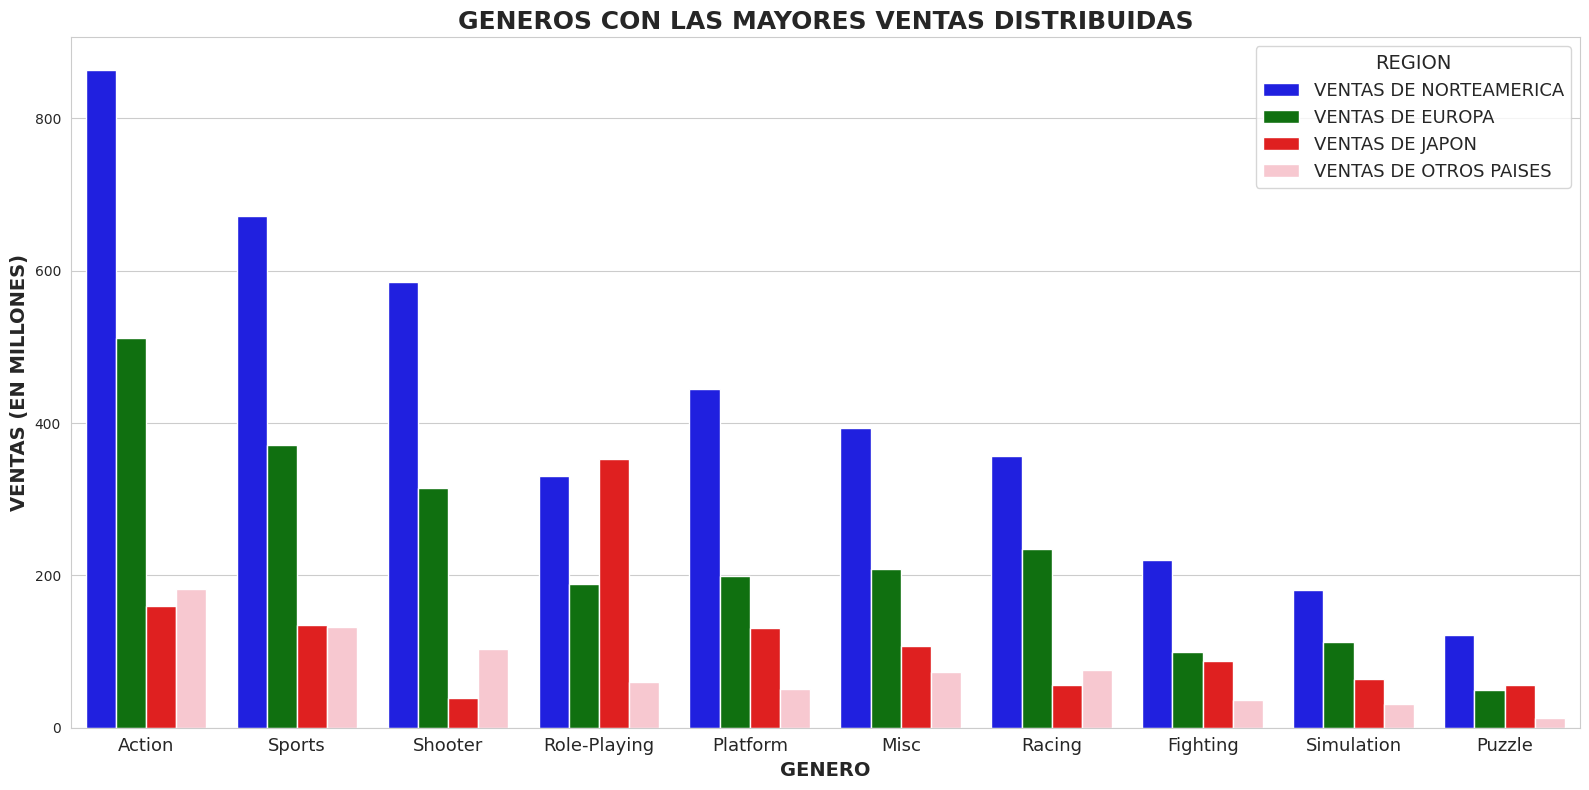

In [18]:
plt.figure(figsize=(16, 8))

# Genero el gráfico de barras agrupadas usando barplot
sns.barplot(
    x='Genero',
    y='Ventas (En millones)',
    hue='Region',
    data = df_grafico_top_genero,
    palette=['blue', 'green', 'red', 'pink'],
ci=None) # Elimino lineas negras de dispersion

# Configuro el estilo del gráfico y las etiquetas
plt.title('GENEROS CON LAS MAYORES VENTAS DISTRIBUIDAS', fontsize=18, fontweight='bold')
plt.xlabel('GENERO', fontsize=14, fontweight='bold')
plt.ylabel('VENTAS (EN MILLONES)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13)

# Configuro la leyenda
plt.legend(title='REGION',
           loc='upper right',
           fontsize=13,
           title_fontsize='14',)

plt.tight_layout()

plt.show()


Hago un diagrama tipo pie distribuido en el top 3 generos con más ventas en japon

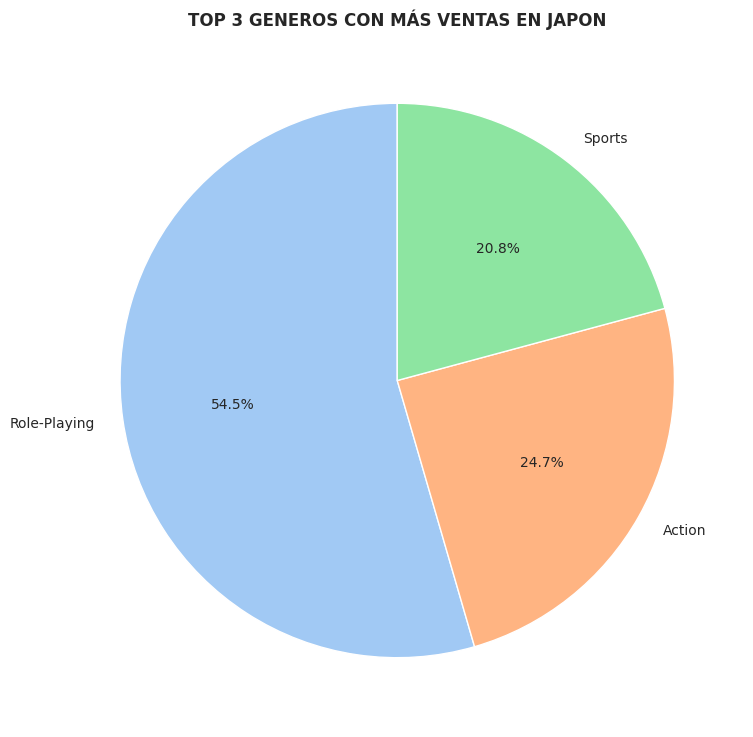

In [19]:
plt.figure(figsize=(15, 9))

# Genero un grafico de torta o (pie)
plt.pie(df_top3_genero_jp['Ventas_JP'],
        labels=df_top3_genero_jp['Genero'],
        autopct='%1.1f%%',
        startangle=90,
        colors= sns.palettes.color_palette('pastel'))
plt.title('TOP 3 GENEROS CON MÁS VENTAS EN JAPON', fontweight='bold')
plt.show()

#1. RESPUESTA:
---
Dado al grafico de barras, la conclución final es que el genero que más tiene dominancia en ventas el global es el genero de accion (Action), seguido del genero de deportes (Sports) y de tercero el de disparos (Shooter).

Pero en Japon analizacdo desde el grafico de barras y el tipo pie el genero más dominante en ventas es de juegos de rol (Role-play), seguido por el genero de accion (Action) y luego el de deportes (Sports)

---

# 2. Cual es el editor que más ventas tiene en Norteamerica? y cual es el juego más jugado de esta plataforma?

In [20]:
# Primero hago el top 10 editores y los organizo
top_editores = df.groupby('Editor')['Ventas_NA'].sum().sort_values(ascending=False).head(10)

print("TOP 10 EDITORES POR VENTAS EN NORTEAMERICA:")
print(top_editores)

TOP 10 EDITORES POR VENTAS EN NORTEAMERICA:
Editor
Nintendo                       815.86
Electronic Arts                588.65
Activision                     428.92
Sony Computer Entertainment    266.17
Ubisoft                        251.85
Take-Two Interactive           222.92
THQ                            207.55
Microsoft Game Studios         157.43
Sega                           107.99
Atari                          101.03
Name: Ventas_NA, dtype: float64


In [21]:
# Hago el top 3 editores de NA a partir del top 10 ya calculado
top_3_editores_NA = top_editores.nlargest(3).reset_index()

print("TOP 3 EDITORES POR VENTAS EN NORTEAMERICA:")
print(top_3_editores_NA)

TOP 3 EDITORES POR VENTAS EN NORTEAMERICA:
            Editor  Ventas_NA
0         Nintendo     815.86
1  Electronic Arts     588.65
2       Activision     428.92


In [22]:
# Sumaré las ventas totales de NA
ventas_totales_NA = df['Ventas_NA'].sum()

# Sumaré las ventas totales del top 3 editores
ventas_top3_NA = top_3_editores_NA['Ventas_NA'].sum()

# Hago el calculo de el resto de ventas en NA, restando el top 3 del total ventas, para sacar un % real de cada editor
ventas_resto_NA = ventas_totales_NA - ventas_top3_NA

# Creo el df de los datos
resto_editores = pd.DataFrame([['Resto de Editores', ventas_resto_NA]],
                        columns=['Editor', 'Ventas_NA'])

# Lo añado a mi df para poder graficar
df_torta_editor_NA = pd.concat([top_3_editores_NA, resto_editores], ignore_index=True)

print("DF FINAL PARA EL GRAFICO TIPO PIA")
print(df_torta_editor_NA)

DF FINAL PARA EL GRAFICO TIPO PIA
              Editor  Ventas_NA
0           Nintendo     815.86
1    Electronic Arts     588.65
2         Activision     428.92
3  Resto de Editores    2502.24


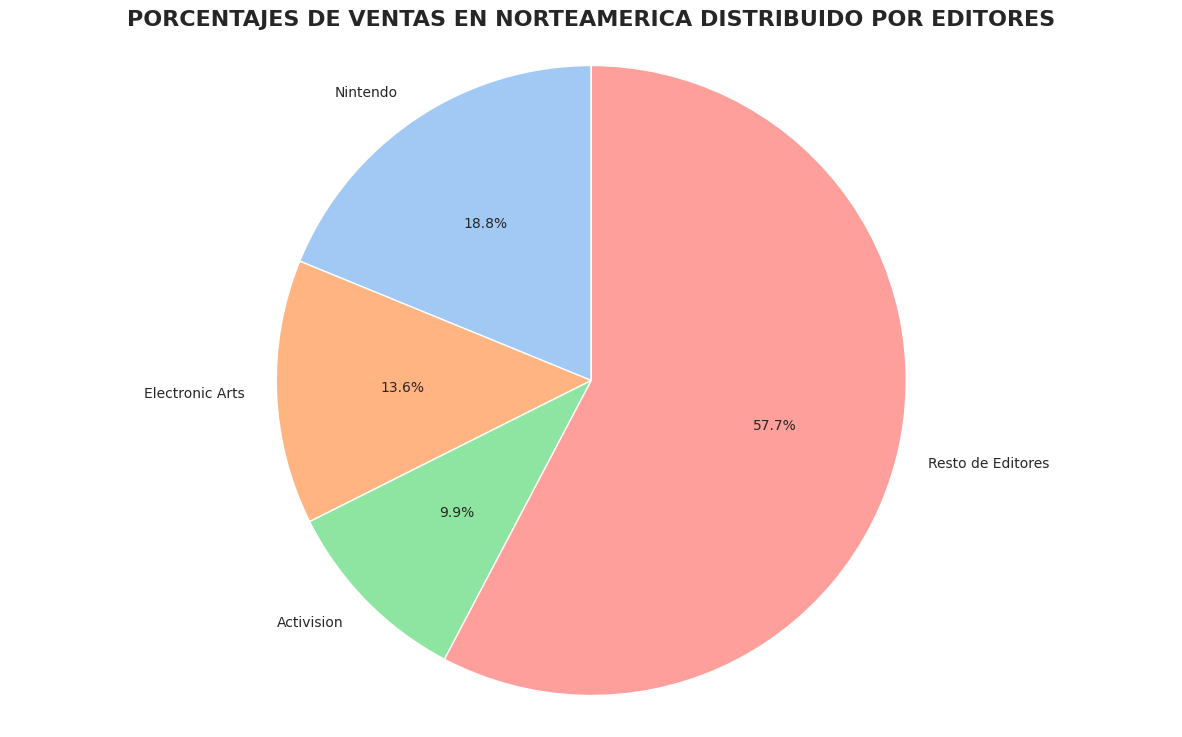

In [23]:
# Defino un tamaño para la figura
plt.figure(figsize=(15, 9))

# Genero el gráfico de pie
plt.pie(
    df_torta_editor_NA['Ventas_NA'],
    labels=df_torta_editor_NA['Editor'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"))

plt.title(
    'PORCENTAJES DE VENTAS EN NORTEAMERICA DISTRIBUIDO POR EDITORES',
    fontsize=16,
    fontweight='bold')

plt.axis('equal')

plt.show()

In [24]:
# realizo el top 10 de juegos de Norteamerica
top_juegos_nintendo=df.loc[df['Editor']=='Nintendo'].sort_values('Ventas_NA',ascending=False).head(10)
top_juegos_nintendo

,Nombre,Plataforma,Año_de_Lanzamiento,Genero,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Otras_Ventas,Ventas_Globales,Puntuacion_Criticos,Conteo_Criticos,Puntuacion_Usuarios,Conteo_Usuarios,Desarrollador,Clasificacion
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


In [25]:
# Ahora solo hago un df con los 3 mejores
top_3_juegos_nintendo = top_juegos_nintendo.nlargest(3, 'Ventas_NA')
top_3_juegos_nintendo = df.groupby('Nombre')['Ventas_NA'].sum().nlargest(3).reset_index()

print('TOP 3 JUEGOS LANZADOS POR NINTENDO EN NA')
print(top_3_juegos_nintendo)

TOP 3 JUEGOS LANZADOS POR NINTENDO EN NA
              Nombre  Ventas_NA
0         Wii Sports      41.36
1  Super Mario Bros.      32.48
2          Duck Hunt      26.93


In [26]:
# Sumaré las ventas de todos los juegos de nintendo en NA
ventas_totales_nintendo = df.loc[df['Editor'] == 'Nintendo', 'Ventas_NA'].sum()

# Sumaré las ventas del top 3 juegos de nintendo en NA
ventas_top3_nintendo = top_3_juegos_nintendo['Ventas_NA'].sum()

# restaré el top 3 juegos del total juegos de nintendo
ventas_resto_nintendo = ventas_totales_nintendo - ventas_top3_nintendo

# crearé el df de resto de ventas y lo ubicaré
resto_juegos_nintendo = pd.DataFrame([['Resto de Juegos', ventas_resto_nintendo]],
                                     columns=('Nombre', 'Ventas_NA'))

# Crearé mi df para graficar
df_torta_juegos_nintendo = pd.concat([top_3_juegos_nintendo, resto_juegos_nintendo], ignore_index=True)

print('JUEGOS MEJOR VENDIDOS EN NORTEAMERICA')
print(df_torta_juegos_nintendo)

JUEGOS MEJOR VENDIDOS EN NORTEAMERICA
              Nombre  Ventas_NA
0         Wii Sports      41.36
1  Super Mario Bros.      32.48
2          Duck Hunt      26.93
3    Resto de Juegos     715.09


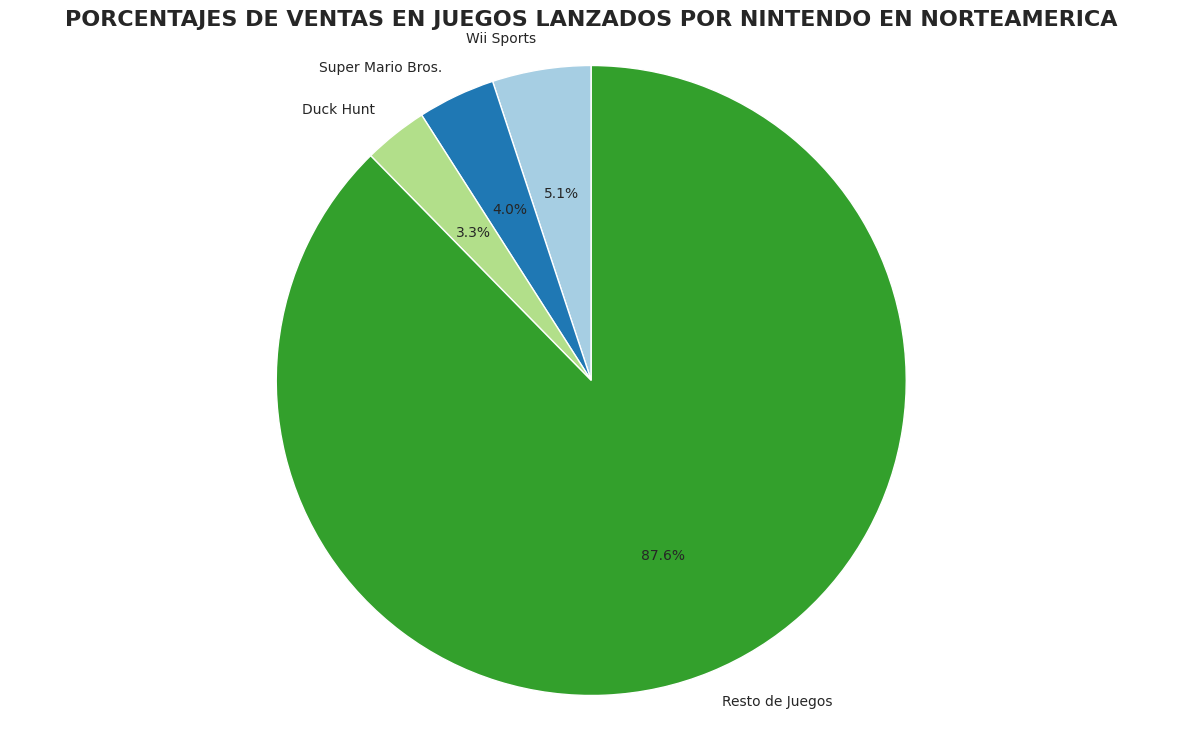

In [27]:
plt.figure(figsize=(15,9))

# Procedo a graficar
plt.pie(
    df_torta_juegos_nintendo['Ventas_NA'],
    labels=df_torta_juegos_nintendo['Nombre'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Paired"))

plt.title(
    'PORCENTAJES DE VENTAS EN JUEGOS LANZADOS POR NINTENDO EN NORTEAMERICA',
    fontsize=16,
    fontweight='bold')

plt.axis('equal')

plt.show()

# 2. RESPUESTA:
---
Con a representacion grafica de los mejores editores en Norteamerica se llega a la conclusion de que el mejor vendido es Nintendo, llevandose un 18.8% del total de las ventas y seguido por por Electronic Arts.

Por su parte el juego más vendido de este editor es el Wii Sports seguido del Mario Bros

La hipótesis inicial es refutada por completo con los datos presentados. El análisis de los gráficos indica que el editor con mayor porcentaje de ventas en Norteamérica es Nintendo (18.8%), y el juego más vendido dentro de su plataforma de lanzamiento analizada es Wii Sports (5.1%). Por lo tanto, ni Activision es el líder en ventas ni Call of Duty es el juego más vendido según la muestra de datos que has utilizado.

---

# 3. Cual es la plataforma que más ventas ha tenido en toda la historia globalmente? y cual es la plataforma más vendida en cada una de las regiones distintivas?

In [28]:
# Sacaré el top 10 plataformas de toda la historia
top_plataformas_historia = df.groupby('Plataforma')['Ventas_Globales'].sum().reset_index()
top_plataformas_historia = top_plataformas_historia.sort_values('Ventas_Globales', ascending=False).head(10)

print(top_plataformas_historia)

   Plataforma  Ventas_Globales
16        PS2          1233.46
28       X360           961.39
17        PS3           931.15
26        Wii           891.74
4          DS           803.44
15         PS           727.41
18        PS4           314.19
6         GBA           305.62
19        PSP           289.79
2         3DS           257.92


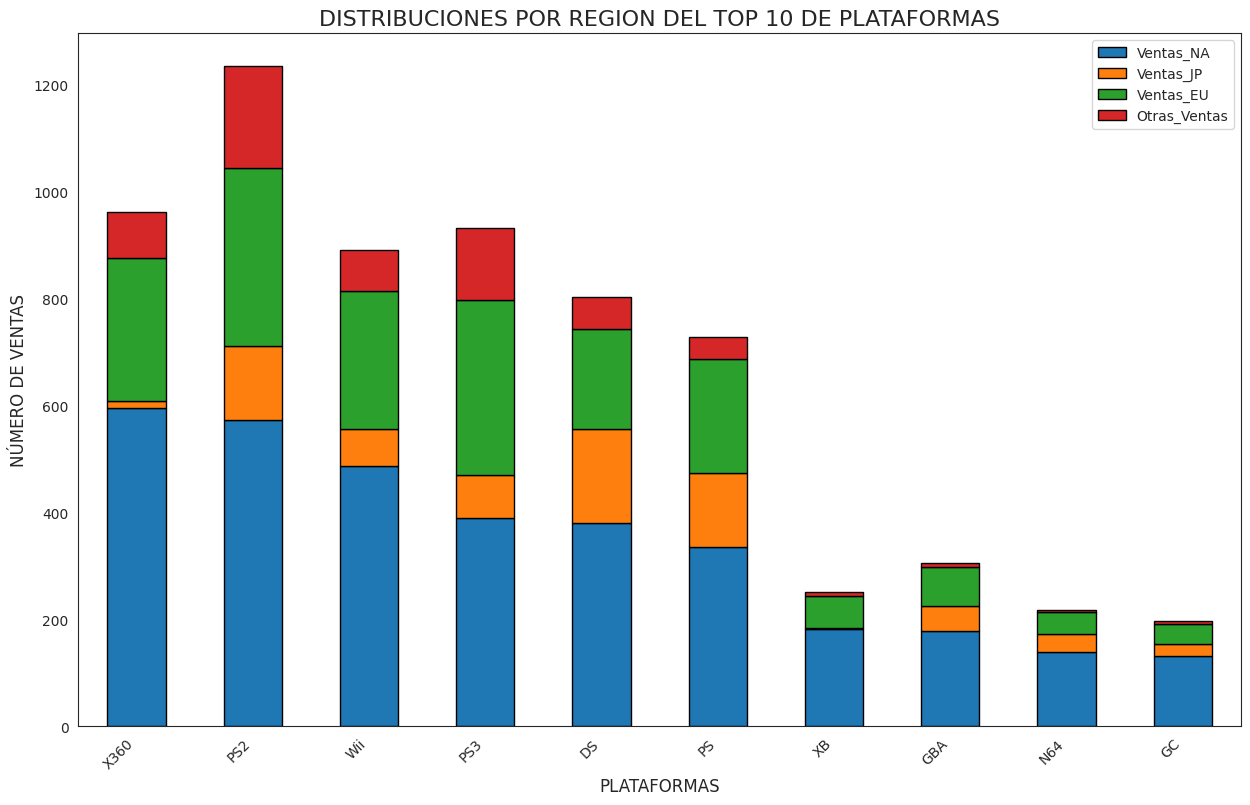

In [29]:
# Graficaré mi top 10 plataformas distribuidas en las 3 principales regiones y el resto
top_plataformas_region = df.groupby('Plataforma')[['Ventas_NA','Ventas_JP','Ventas_EU', 'Otras_Ventas']].sum().reset_index()
top_plataformas_region = top_plataformas_region.sort_values('Ventas_NA', ascending=False).head(10)

sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,9))
top_plataformas_region.plot(kind='bar',
                            x='Plataforma',
                            stacked=True,
                            ax=ax,
                            edgecolor='black')

plt.title('TOP 10 PLATAFORMAS CON MÁS VENTAS EN TODAS LAS REGIONES', fontsize=16, fontweight='bold')
ax.set_title('DISTRIBUCIONES POR REGION DEL TOP 10 DE PLATAFORMAS', fontsize=16)
ax.set_xlabel('PLATAFORMAS', fontsize=12)
ax.set_ylabel('NÚMERO DE VENTAS', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()


In [30]:
df_grafico_top_plataformas_region = top_plataformas_region.melt(
    id_vars=['Plataforma'],
    value_vars=['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Otras_Ventas'],
    var_name='Region',
    value_name='Ventas (En millones)')

# Renombro las etiquetas de las regiones para la gráfica
df_grafico_top_plataformas_region['Region'] = df_grafico_top_plataformas_region['Region'].replace({
    'Ventas_NA': 'VENTAS DE NORTEAMERICA',
    'Ventas_EU': 'VENTAS DE EUROPA',
    'Ventas_JP': 'VENTAS DE JAPON',
    'Otras_Ventas': 'VENTAS DE OTROS PAISES'})

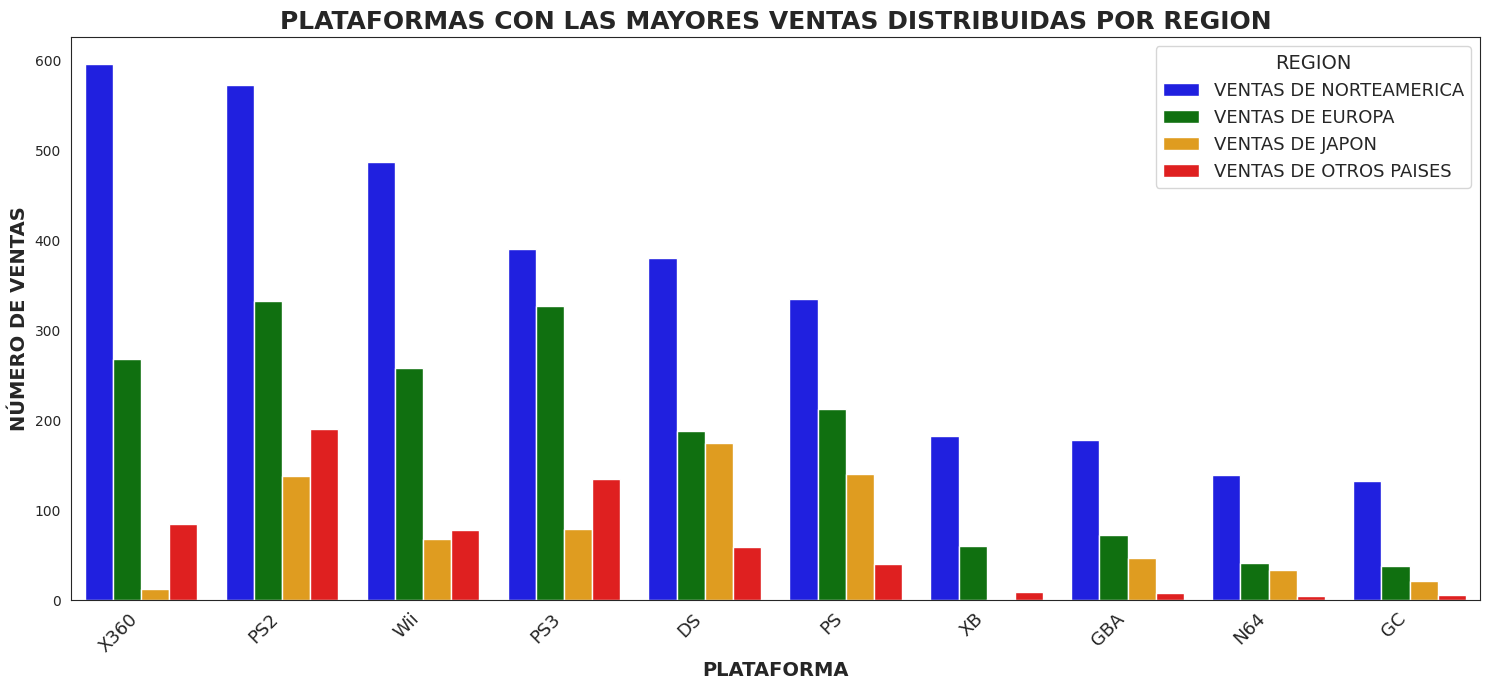

In [31]:
plt.figure(figsize=(15, 7))
sns.barplot(
    x='Plataforma',
    y='Ventas (En millones)',
    hue='Region',
    data = df_grafico_top_plataformas_region,
    palette=['blue', 'green', 'orange', 'red'])

# Configuro el estilo del gráfico y las etiquetas
plt.title('PLATAFORMAS CON LAS MAYORES VENTAS DISTRIBUIDAS POR REGION', fontsize=18, fontweight='bold')
plt.xlabel('PLATAFORMA', fontsize=14, fontweight='bold')
plt.ylabel('NÚMERO DE VENTAS', fontsize=14, fontweight='bold')
plt.xticks(fontsize=13, rotation=45, ha='right')

# Configuro la leyenda
plt.legend(title='REGION',
           loc='upper right',
           fontsize=13,
           title_fontsize='14')

plt.tight_layout()
plt.show()

Ahora haré sacaré una tendencia de las ventas por regiones y por plataformas

In [32]:
# Genero el df de ventas anuales
df_ventas_anuales_plataforma = df.groupby(['Año_de_Lanzamiento', 'Plataforma'])[['Ventas_Globales']].sum().reset_index()

# Saco el top 10 historico, para hacer una grafica más limpia
ventas_totales_por_plataforma = df.groupby('Plataforma')['Ventas_Globales'].sum()
top_10_plataformas_lista = ventas_totales_por_plataforma.nlargest(10).index.tolist()

df_ventas_anuales_plataforma_top_10 = df_ventas_anuales_plataforma[
    df_ventas_anuales_plataforma['Plataforma'].isin(top_10_plataformas_lista)
]

# Cambio el nombre de las etiquetas
df_ventas_anuales_plataforma_top_10 = df_ventas_anuales_plataforma_top_10.melt(
    id_vars=['Año_de_Lanzamiento', 'Plataforma'],
    value_vars=['Ventas_Globales'],
    var_name='Region',
    value_name='Ventas(En millones)')

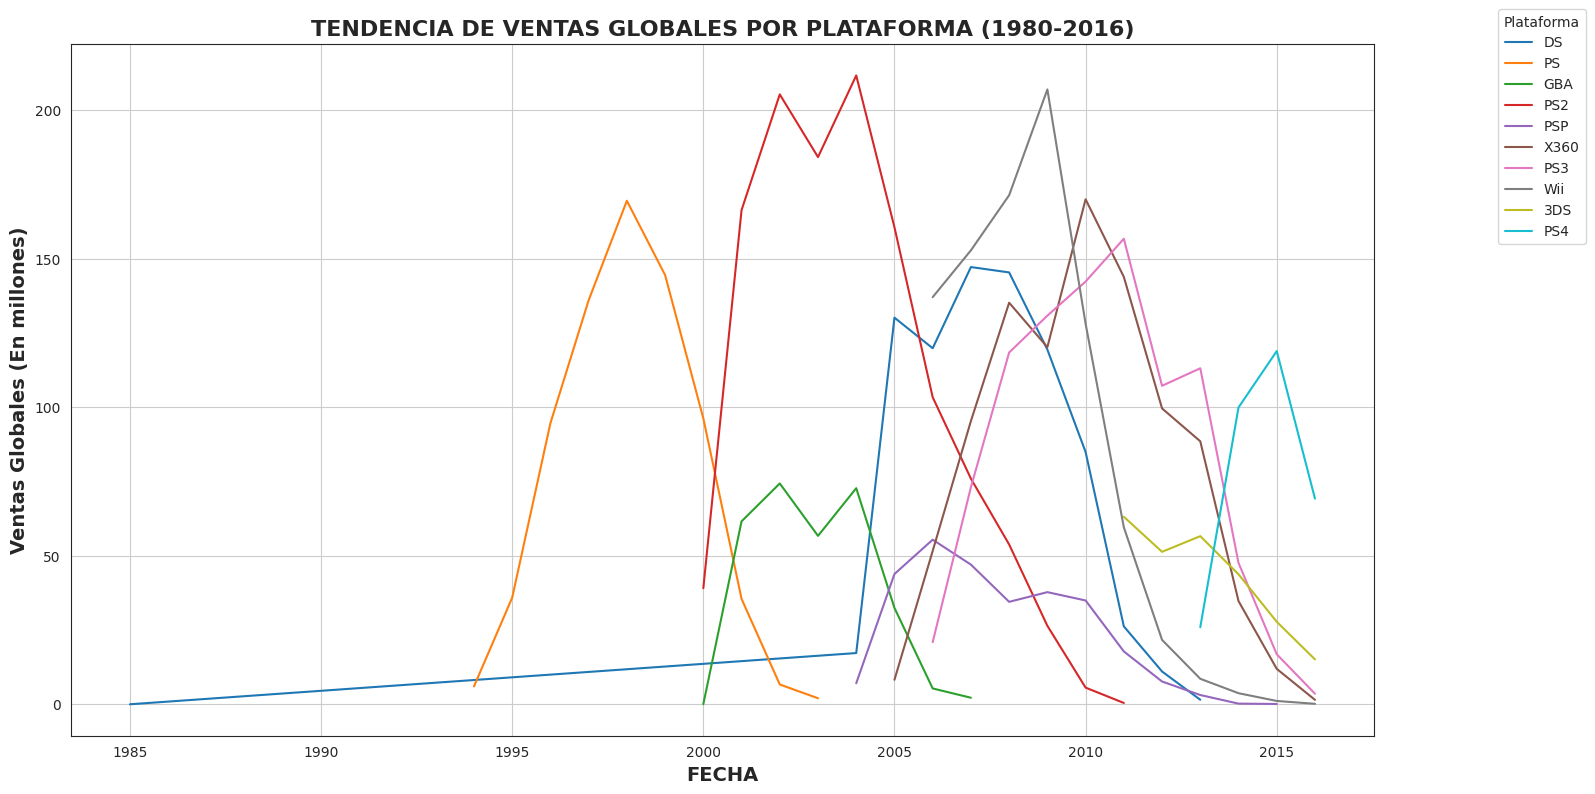

In [33]:
plt.figure(figsize=(16, 8))

# Procedo a graficar un histograma sobre las ventas
sns.lineplot(
    data=df_ventas_anuales_plataforma_top_10,
    x='Año_de_Lanzamiento',
    y='Ventas(En millones)',
    hue='Plataforma',
    legend=True,
    palette='tab10')

# Configuro mi grafico
plt.title('TENDENCIA DE VENTAS GLOBALES POR PLATAFORMA (1980-2016)', fontsize=16, fontweight='bold')
plt.xlabel('FECHA', fontsize=14, fontweight='bold')
plt.ylabel('Ventas Globales (En millones)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.09, 1.06), loc='upper left')

plt.tight_layout()

plt.show()

# 3. RESPUESTA
---

Tras analizar los resultados de ventas globales y regionales, mi hipótesis fue parcialmente confirmada. Originalmente, creí que la Nintendo Wii sería la plataforma más vendida globalmente, pero los datos del gráfico de barras demuestran que la PS2 ostenta el título de la plataforma histórica con mayores ventas totales. A nivel regional, acerté en que la XBOX360 dominaría Norteamérica (NA) y que la Nintendo DS sería la líder en Japón, lo cual concuerda con las tendencias esperadas. Sin embargo, me equivoqué rotundamente con Europa (EU), donde mi hipótesis apuntaba al PC como líder; en realidad, los datos revelan que la PS2 también fue la principal plataforma en el mercado europeo, mostrando un dominio más consistente y equilibrado a nivel mundial que el resto de las consolas.

---


---
# DESAROLLO DEL ENTREGABLE PARA EL PROYECTO FINAL
# RESUMEN:
El presente trabajo se desarrolló la evaluación de un modelo predictivo para las ventas globales de videojuegos utilizando técnicas de ML. Se exploraron dos enfoques algorítmicos: la Regresión Lineal y el Random Forest Regressor ya que con el uso unicamente de la regresion lineal no tuve un buen puntaje de variabilidad $R^2$

Para mejorar la precisión, se realizó un preprocesamiento de datos que incluyó la limpieza de valores nulos, la conversión de variables categóricas (como Género y Plataforma) mediante One-Hot Encoding y la aplicación de una transformación logarítmica a la variable objetivo para normalizar la distribución de ventas, esto contribuyó en la mejora notable del MCE y el $R^2$.

---

# OBJETIVO:
Desarrollar un modelo predictivo capaz de estimar las ventas de un videojuego (en millones de copias) a partir de variables como la plataforma, el género, las calificaciones de la crítica/usuarios y el año de lanzamiento.

 ---

 # CONTEXTO COMERCIAL :
Global Peak Interactive (Consultora de Estrategia para Estudios de Videojuegos).

En un mercado saturado con miles de lanzamientos anuales, los estudios de desarrollo se enfrentan a un riesgo financiero extremo. El costo de producción de un título moderno puede superar los 50 millones de dólares, y una decisión errónea sobre en qué plataforma lanzar o qué género priorizar puede llevar a la quiebra a un estudio mediano.

Global Peak Interactive ha sido contratada para crear una herramienta de inteligencia de negocios que permita a los inversores predecir el retorno de inversión (ROI) antes de que el juego entre en fase de producción total. La empresa necesita saber si el éxito comercial es puramente "suerte" o si existen variables predecibles que garanticen un volumen de ventas mínimo.

---


Visualizando mi dataset encuentro que las variables con mejor capacidad de resolver mi estudio del mismo y que tienen una alta capacidad predictiva son las columnas de: Plataforma', 'Genero', 'Puntuacion_Criticos', 'Puntuacion_Usuarios', 'Clasificacion', 'Año_de_Lanzamiento' siendo estas las escogidas para hacer el entrenamiento.

In [34]:
columnas_interes = ['Plataforma', 'Genero', 'Puntuacion_Criticos', 'Puntuacion_Usuarios', 'Clasificacion', 'Año_de_Lanzamiento']
print('TOTAL DE NULL EN MIS COLUMNAS DE INTERES')
print(df[columnas_interes].isnull().sum())
print('TIPO DE DATO DE MIS COLUMNAS DE INTERES')
print(df[columnas_interes].dtypes)

TOTAL DE NULL EN MIS COLUMNAS DE INTERES
Plataforma                0
Genero                    0
Puntuacion_Criticos    8430
Puntuacion_Usuarios    6576
Clasificacion          6646
Año_de_Lanzamiento        0
dtype: int64
TIPO DE DATO DE MIS COLUMNAS DE INTERES
Plataforma              object
Genero                  object
Puntuacion_Criticos    float64
Puntuacion_Usuarios     object
Clasificacion           object
Año_de_Lanzamiento     float64
dtype: object


 Voy a empezar por hacer la limpieza de datos y una revision de los datos NULL ya que tengo muchos de estos datos en mis columnas de clasificacion, puntuacion de los criticos y la puntuacion de los usuarios.

In [35]:
# Identifico que es lo que convierte mi columna en el tipo 'object'
print(df['Puntuacion_Usuarios'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Veo que mi variable de puntuacion criticos tiene como tipo de dato 'object' ya que tiene datos de texto que dicen 'tbd' o to be defined y no los podria manejar asi para mi entrenamiento.


Hacemos Encoding para que el modelo pueda "entender" que el hecho de que un juego sea de Acción o de la plataforma PS4 es una característica numérica que influye en las Ventas_Globales.

In [36]:
# Voy convertir Puntuacion_Usuarios a numérico (manejando los "tbd" como NaN)
df['Puntuacion_Usuarios'] = pd.to_numeric(df['Puntuacion_Usuarios'], errors='coerce')

# Voy a rellenar nulos en puntuaciones usando la mediana por genero
# para asegurar que un juego de 'Accion' se compare con sus pares y no con el promedio global
df['Puntuacion_Criticos'] = df.groupby('Genero')['Puntuacion_Criticos'].transform(lambda x: x.fillna(x.median()))
df['Puntuacion_Usuarios'] = df.groupby('Genero')['Puntuacion_Usuarios'].transform(lambda x: x.fillna(x.median()))

# Voy a eliminar filas donde el Año o la Clasificacion sean nulos (datos críticos faltantes)
df.dropna(subset=['Año_de_Lanzamiento', 'Clasificacion'], inplace=True)

# asegurarme que el Año sea un número entero
df['Año_de_Lanzamiento'] = df['Año_de_Lanzamiento'].astype(int)

print(df[['Puntuacion_Criticos', 'Puntuacion_Usuarios', 'Año_de_Lanzamiento']].isnull().sum())

Puntuacion_Criticos    0
Puntuacion_Usuarios    0
Año_de_Lanzamiento     0
dtype: int64


In [37]:
columnas_interes = ['Plataforma', 'Genero', 'Puntuacion_Criticos', 'Puntuacion_Usuarios', 'Clasificacion', 'Año_de_Lanzamiento']
print('TOTAL DE NULL EN MIS COLUMNAS DE INTERES')
print(df[columnas_interes].isnull().sum())
print('TIPO DE DATO DE MIS COLUMNAS DE INTERES')
print(df[columnas_interes].dtypes)

TOTAL DE NULL EN MIS COLUMNAS DE INTERES
Plataforma             0
Genero                 0
Puntuacion_Criticos    0
Puntuacion_Usuarios    0
Clasificacion          0
Año_de_Lanzamiento     0
dtype: int64
TIPO DE DATO DE MIS COLUMNAS DE INTERES
Plataforma              object
Genero                  object
Puntuacion_Criticos    float64
Puntuacion_Usuarios    float64
Clasificacion           object
Año_de_Lanzamiento       int64
dtype: object


Ahora que ya tengo los datos limpios, el siguiente paso es hacer una metrica de evaluacion del modelo
1. ($R^2$): Llamado Coeficiente de Determinación.
 Indica qué porcentaje de la variación de las ventas es explicado por mis variables independientes (Plataforma, Género, etc.).
2. MSE: Llamado Error Cuadrático Medio. Representa el promedio de los errores al cuadrado; es decir, la diferencia entre lo que el modelo predijo y lo que realmente se vendió.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creare el  data frame final para mi algoritmo
columnas_interes = ['Plataforma', 'Genero', 'Puntuacion_Criticos', 'Puntuacion_Usuarios', 'Clasificacion', 'Año_de_Lanzamiento', 'Ventas_Globales']
df_final = df[columnas_interes].dropna()

# Convertire categorías a números (One-Hot Encoding)
X = df_final.drop('Ventas_Globales', axis=1)
X_dummy = pd.get_dummies(X, columns=['Plataforma', 'Genero', 'Clasificacion'], drop_first=True)

# Voy a definir el objetivo (Y)
y = df_final['Ventas_Globales']

# Haré una división de datos para comparar mi algoritmo
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)

# Entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones y Métricas
predicciones = modelo.predict(X_test)

r2_lineal = r2_score(y_test, predicciones)
mse_lineal = mean_squared_error(y_test, predicciones)

print(f"R2 inicial: {r2_lineal:.4f}")
print(f"MSE inicial: {mse_lineal:.4f}")

R2 inicial: 0.0662
MSE inicial: 5.7893


Al analizar los resultados iniciales, se observó un coeficiente de determinación ($R^2$) extremadamente bajo de 0.0662, lo que indica que el modelo original apenas logra explicar el 6% de la variabilidad de las ventas. Esta deficiencia se debe a la naturaleza altamente dispareja de los datos de la industria de los videojuegos, donde una pequeña cantidad de títulos ('Super Hits') acumulan ventas masivas (outliers), mientras que la gran mayoría de los juegos tienen ventas modestas. Ahora  voy a aplicar la transformación logarítmica ($log1p$), para lograr normalizar la distribución y comprimir la distancia entre los juegos más vendidos y los menos vendidos, permitiendo que el algoritmo aprenda patrones generales en lugar y desviarse con los valores atípicos.

In [39]:
# Objetivo transformado (y_log)
X = df_final.drop('Ventas_Globales', axis=1)
X_dummy = pd.get_dummies(X, columns=['Plataforma', 'Genero', 'Clasificacion'], drop_first=True)
y_log = np.log1p(df_final['Ventas_Globales']) # Aplico el logaritmo aquí

# Hago la división de datos (Usando y_log para que el modelo aprenda la escala correcta)
X_train, X_test, y_train_log, y_test_log = train_test_split(X_dummy, y_log, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train_log)

# Predicciones y Cálculo de R2
pred_log = modelo.predict(X_test)
r2_mejorado = r2_score(y_test_log, pred_log)

# Hago la reversión para el MSE Real (Sin desbordamiento)
pred_log_safe = np.clip(pred_log, 0, y_log.max())
pred_real = np.expm1(pred_log_safe)
y_test_real = np.expm1(y_test_log)

mse_mejorado = mean_squared_error(y_test_real, pred_real)

print(f"R2 (Logaritmo): {r2_mejorado:.4f}")
print(f"MSE (Logaritmo): {mse_mejorado:.4f}")

R2 (Logaritmo): 0.2538
MSE (Logaritmo): 5.9139


Despues de aplicar logaritmica a mi algoritmo se nota un visible mejora en el $R^2$ pero aun sigue representando el 25% de los datos y no es suficiente rendimiento para el mismo. Optare por aplicar una metrica de Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Repito la división de datos
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_log, test_size=0.2, random_state=42)

# Entrenamiento con Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones y resultados
pred_log = modelo_rf.predict(X_test)

# Métricas
r2_resultado = r2_score(y_test, pred_log)
y_test_real = np.expm1(y_test)
pred_real = np.expm1(pred_log)
mse_resultado = mean_squared_error(y_test_real, pred_real)

print("--- RESULTADOS RANDOM FOREST ---")
print(f"R2 Final: {r2_resultado:.4f}")
print(f"MSE Final: {mse_resultado:.4f}")

--- RESULTADOS RANDOM FOREST ---
R2 Final: 0.4082
MSE Final: 5.1769


Aunque el modelo de Random Forest es naturalmente más robusto ante valores atípicos que la regresión lineal, el uso de la transformación logarítmica fue importante para alcanzar un R2 de 0.4082. Sin esta transformación, el modelo inicial presentaba un rendimiento pobre ($R^2 = 0.0662$), ya que los algoritmos basados en árboles de decisión tienden a 'especializarse' demasiado en los valores extremos (juegos con ventas masivas), perdiendo precisión en el 95% restante del resto.

El MSE está en "unidades al cuadrado" (millones de copias al cuadrado), lo cual es difícil de imaginar. Para que el resultado tenga sentido comercial, le sacaré la raíz cuadrada. Si mi MSE es 5.1769, la raíz es $\sqrt{5.1769} \approx 2.27$. y se puede interpretar como: "En promedio, mi modelo se equivoca por 2.27 millones de copias por cada videojuego".

In [41]:
# Voy a extraer la importancia de las características para la adquisicion de datos
importancias = modelo_rf.feature_importances_
nombres_columnas = X_dummy.columns

# Voy a crear un DataFrame para visualizarlo mejor
tabla_importancia = pd.DataFrame({'Variable': nombres_columnas, 'Importancia': importancias})
tabla_importancia = tabla_importancia.sort_values(by='Importancia', ascending=False)

print("TOP 5 VARIABLES QUE MÁS AFECTAN LAS VENTAS")
print(tabla_importancia.head(5))

TOP 5 VARIABLES QUE MÁS AFECTAN LAS VENTAS
               Variable  Importancia
0   Puntuacion_Criticos     0.336677
1   Puntuacion_Usuarios     0.169034
2    Año_de_Lanzamiento     0.131386
7         Plataforma_PC     0.047241
34      Clasificacion_M     0.019915


Text(0, 0.5, 'Ventas Predichas (Millones de copias)')

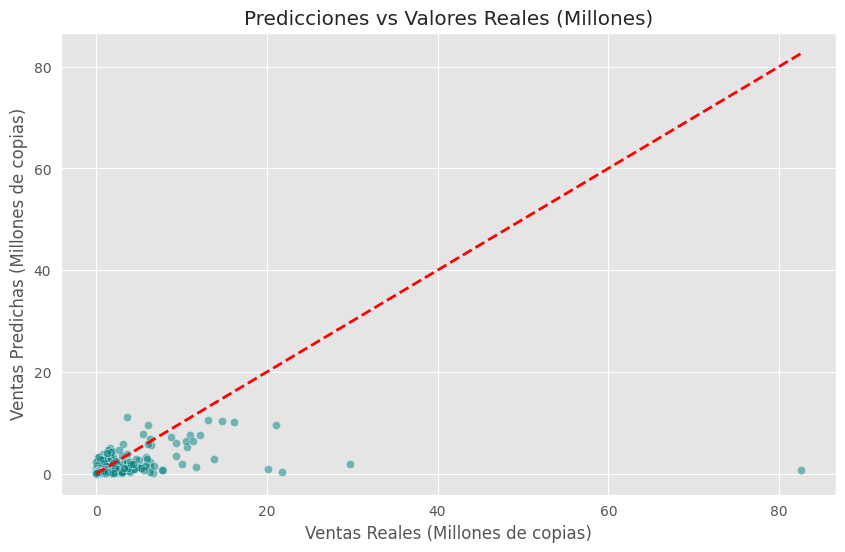

In [42]:
# Voy a configurar el estilo de las gráficas
plt.style.use('ggplot')
fig, ax = plt.subplots(1, figsize=(10, 6))


# Usaré 'pred_real' y 'y_test_real' para graficar
sns.scatterplot(x=y_test_real, y=pred_real, alpha=0.5, ax=ax, color='teal')

# Dibujaré una línea de 45 grados (donde la predicción sería perfecta)
linea_ideal = [y_test_real.min(), y_test_real.max()]
ax.plot(linea_ideal, linea_ideal, color='red', linestyle='--', lw=2)

ax.set_title('Predicciones vs Valores Reales (Millones)')
ax.set_xlabel('Ventas Reales (Millones de copias)')
ax.set_ylabel('Ventas Predichas (Millones de copias)')

Creo que será mejor usar una grafica interactiva para ver mejor los datos.


In [43]:
import plotly.express as px

# Necesito unir los nombres de los juegos con los resultados del test
# Creo un dataframe temporal para la gráfica
df_interactivo = df_final.loc[X_test.index].copy()
df_interactivo['Ventas_Predichas'] = pred_real

# Creamos la gráfica con Plotly
fig = px.scatter(
    df_interactivo,
    x='Ventas_Globales',
    y='Ventas_Predichas',
    hover_name=df.loc[X_test.index, 'Nombre'],
    color='Genero',
    size='Puntuacion_Criticos',
    labels={
        'Ventas_Globales': 'Ventas Reales (Millones)',
        'Ventas_Predichas': 'Ventas Predichas (Millones)'
    },
    title='Identificación de Juegos: Ventas Reales vs Predichas',
    template='plotly_white'
)

# Añadire la línea de referencia (ideal)
fig.add_shape(
    type="line", line=dict(dash='dash', color="red"),
    x0=0, y0=0, x1=df_interactivo['Ventas_Globales'].max(), y1=df_interactivo['Ventas_Globales'].max()
)

fig.show()

/tmp/ipython-input-2718352315.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




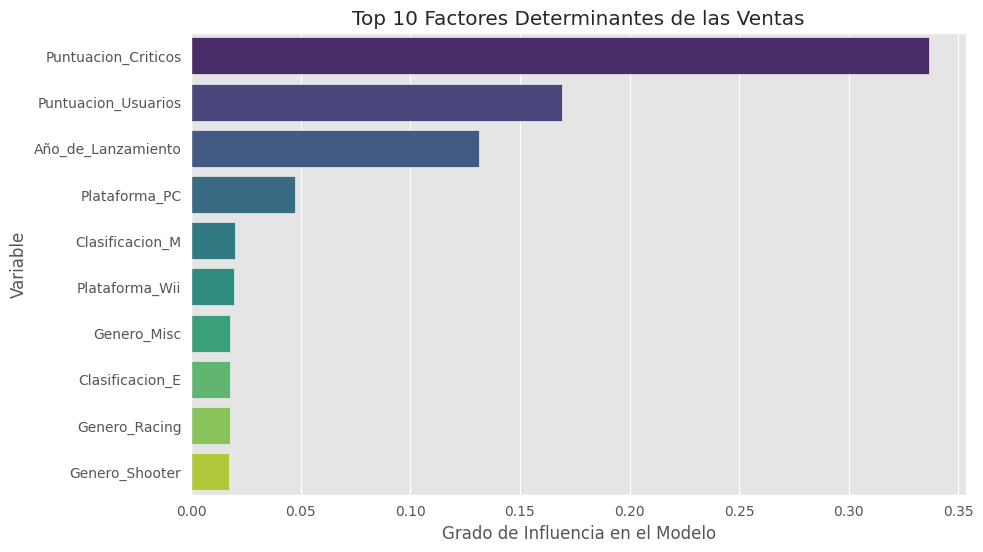

In [44]:

importancias = modelo_rf.feature_importances_
nombres_columnas = X_dummy.columns
tabla_importancia = pd.DataFrame({'Variable': nombres_columnas, 'Importancia': importancias})
tabla_importancia = tabla_importancia.sort_values(by='Importancia', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=tabla_importancia, palette='viridis')

plt.title('Top 10 Factores Determinantes de las Ventas')
plt.xlabel('Grado de Influencia en el Modelo')
plt.ylabel('Variable')
plt.show()

#CONCLUSÓN:
El análisis realizado mediante técnicas de Machine Learning permitió identificar que el éxito comercial de un videojuego no es un fenómeno aleatorio, sino que responde a patrones complejos que un modelo de Random Forest logra capturar en un 40.82%.

A diferencia de la regresión lineal simple, este modelo detectó que variables como la Puntuación de la Crítica y la Plataforma tienen un impacto no lineal; es decir, alcanzar la excelencia (puntajes superiores a 90) genera un retorno en ventas desproporcionadamente mayor que un puntaje promedio.

Sin embargo, el 60% restante de la varianza resalta la naturaleza impredecible de la industria, donde factores externos como el presupuesto de marketing, la lealtad a la marca (franquicias) y el efecto de las redes sociales —variables no contenidas en el dataset original— juegan un papel crítico. En conclusión, el modelo es una herramienta robusta para predecir el 'suelo' de ventas esperado, pero los 'Mega Hits' siguen siendo excepciones estadísticas que desafían los modelos tradicionales."